1


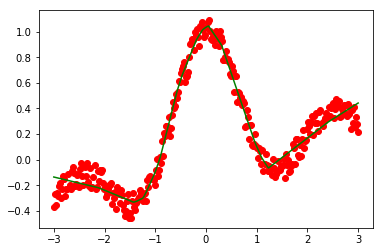

end


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

dataLen =300
xData = np.linspace(-3,3,dataLen)[:,np.newaxis]# 此处注意，[:,np.newaxis]是为了创建成30行，一列的矩阵。使用reshape[-1，1]，只能形成30行的数组
pix = math.pi*xData
yRandom = np.random.rand(dataLen)[:,np.newaxis]-0.5

yData =  np.sin(pix)/pix + 0.1*xData +0.2*yRandom




# xData = np.linspace(-1,1,dataLen)[:, np.newaxis]
# noise = np.random.normal(0, 0.05, xData.shape)
# yData = np.square(xData) - 0.5 + noise




xInput = tf.placeholder(tf.float32,shape=xData.shape)
yInput =  tf.placeholder(tf.float32,shape=yData.shape)

# size 每个神经节点的，权重个数
# nodeNum 节点个数
def inLayout(inputDatas,inputSize,outSize,activationFun = None):
    Weight = tf.Variable(tf.random_normal([inputSize,outSize],stddev=0.25),name="W")
    Bais =  tf.Variable(tf.zeros([1,outSize]) + 0.1,name = "B")
    
    tempResult = tf.matmul(inputDatas,Weight) + Bais
    
    if activationFun is None :
        result = tempResult
    else:
        result = activationFun(tempResult)
#         result = activationFun(tempResult)
#         result = tf.where(result<0,0,result)
    
    return result

print("1")

L1 = inLayout(xInput,1,10,activationFun = tf.nn.relu)
L2 = inLayout(L1,10,10,activationFun =tf.nn.relu)
L3= inLayout(L2,10,10,activationFun = tf.nn.relu)

preCalValue = inLayout(L3,10,1,activationFun = None)
loseFunction = tf.reduce_mean(tf.reduce_sum(tf.square(yInput-preCalValue),reduction_indices=[1]))

trainstep = tf.train.GradientDescentOptimizer(0.1).minimize(loseFunction)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        sess.run(trainstep,feed_dict={xInput:xData,yInput:yData})
#         if i%50 == 0:
       # print(sess.run(preCalValue,feed_dict={xInput:xData,yInput:yData}))
#             print(sess.run(loseFunction,feed_dict={xInput:xData,yInput:yData}))
           
               
    newY = sess.run(preCalValue,feed_dict={xInput:xData,yInput:yData})
    plt.plot(xData,yData,'o',c='r')
    plt.plot(xData,newY,c="g")
   
    plt.show()

    
print("end")


    
    
    
    


    





